(EN CONSTRUCCIÓN)

Esta página es excelente: [https://ciechanow.ski/cameras-and-lenses](https://ciechanow.ski/cameras-and-lenses)

[Drawing machines](https://drawingmachines.org/)

# Motivación

¿Dónde estoy?

![loc](../images/demos/locr.png)

¿A qué distancia está el objeto?

![coche](../images/demos/coches.png)

¿Cúanto mide el objeto?

![agua](../images/agua.png)

![piedra](../images/demos/piedra.png)

¿Dónde tengo que situar la cámara para que abarque completamente una escena?

![voley](../images/demos/volley.png)

¿Qué operación matemática hace una cámara?

¿Qué distingue una cámara de otra?

- Calidad
    - fidelidad de color
    - nitidez, separación angular

- Geometría
    - deformación de perspectiva (buena)
    - distorsión (radial, etc.) (mala, pero se puede compensar)

Una **imagen** es una representación plana del mundo 3D.

![magritte](../images/demos/Magritte-human-condition.jpg)

Aunque la información de profundidad se pierde, una imagen es correcta si representa fielmente, a escala, cualquier escena plana frontal. Entonces el factor de escala es inversamente proporcional a la distancia. Se producen los efectos de perspectiva: puntos de fuga, horizonte etc.

# Modelo "pinhole"

![pinhole](../images/demos/pinhole.svg)

$$x = f \frac{X}{Z}\hspace{3em} y = f \frac{Y}{Z}$$

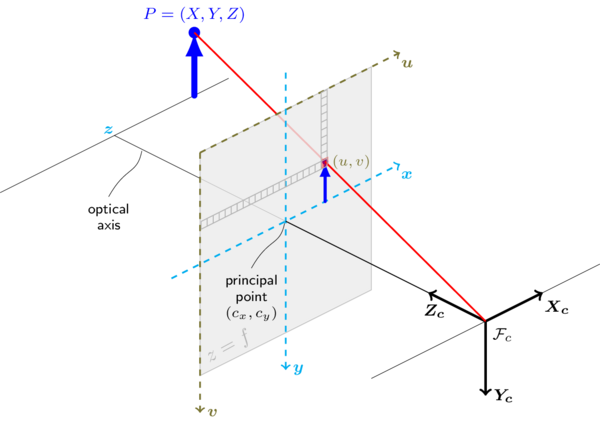

La cámára abarca un cierto **ángulo de visión**  o campo visual (*field of view*, FOV). 

Analogía con transportador de ángulos.

El coeficiente $f$ es la **distancia focal** $f$ en pixels. Es la distancia entre el plano de imagen y el centro de proyección.

$$pixel = f \frac{tamaño}{distancia}$$

El campo de visión (FOV) (horizontal o vertical) viene dado por un triángulo cuya altura es la distancia $f$ y la base el tamaño del sensor (el ancho o el alto en pixels).

Conversión pixel-ángulo.

$$\tan(\alpha) = \frac{u}{f}$$

Para ángulos pequeños $\tan(\alpha)\simeq \alpha$, podemos interpretar $1/f$ como el factor de conversión de pixels a grados. (Solo es válido de forma aproximada en la zona central de la imagen.)

Coordenadas normalizadas. Independientes de la resolución de la imagen, con $f$=1.

Puede deducirse a veces de campos exif en jpeg y de las [características de la cámara](https://www.devicespecifications.com/en/model/4e69458c).

La imagen digital tiene una **resolución** ($w\times h$) que es el número de filas y columnas que discretizan el plano de imagen.

Relación de aspecto (**aspect ratio**), remuestreo (**resize**).

El brillo en la imagen depende de la iluminación de la escena, de la apertura, del **tiempo de obturación**, y de la sensibilidad del sensor.

Resolución angular.

**ROI** (region of interest) rectangular (pointer+step), **mask** para seleccionar pixels cualesquiera.

Canales de color, pixel type, pixel order (entrelazado, planar)

Imágenes opencv $\iff$ arrays numpy

# Calibración

## Calibración aproximada

Medimos con una regla el tamaño de un objeto. Por ejemplo una botella, que mide X=10cm. La situamos delante de la cámara a una distancia p.ej. Z=30cm. Medimos en la imagen el tamaño del objeto, p.ej. u = 230pix.

$$u= f \frac{X}{Z}$$

$$f=690 pix$$

Para saber el campo visual (FOV) necesitamos la resolución (w x h) de la cámara. El tamaño de la imagen anterior es p.ej. (800x600), el FOV horizontal será:

$$\tan \left(\frac{FOV}{2}\right) = \frac{\frac{w}{2}}{f}$$

$$FOV = 60.2^o$$

El FOV vertical es $47.0^o$.

## Calibración precisa

Para la calibración precisa se puede utilizar el código disponible en `code/calibrate`, siguiendo la instrucciones del README. Uno de los resultados que produce es la matriz de cámara $K$, que contiene en la diagonal el valor de $f$:

$$K =\begin{bmatrix}f & s & o_x \\  0 & fr & o_y \\ 0 & 0 & 1\end{bmatrix}$$ 

Debe tener un valor parecido ($\pm 30\%$) al obtenido de forma aproximada.

La matriz de calibración se usará más adelante en los ejercicios de geometría visual.

La *focal length* suele aparecer en los metadatos en las fotos del móvil (pero no en pantallazos de la webcam). Puede consultarse con la aplicación "image viewer" de gnome (eog), [como se ve aquí](../images/demos/focalinfo2.png). El valor de focal length que nos interesa es el equivalente a 35mm (correspondiente a un sensor 36mmx24mm). Nos dice que la foto de este ejemplo tiene una focal equivalente a 52.0mm para un ancho de sensor de 36mm. Resolviendo el triángulo encontramos un FOV de $38.2^{\circ}$. Alternativamente, podemos consultar [una tabla como ésta](https://www.nikonians.org/reviews/fov-tables) en la que el valor más cercano que aparece es 50mm, que corresponde a $39.6^\circ$.

Si en los metadatos aparece la focal length pero no la equivalente a 35mm, entonces necesitamos conocer el tamaño real del sensor, que a veces puede encontrarse en las especificaciones técnicas del teléfono móvil, pero no merece la pena perder mucho tiempo con esto.